In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
dataset = pd.read_csv("diabetes_prediction_dataset.csv")
dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [16]:
X = dataset.drop( columns = ["diabetes"] , axis = 1)
y = dataset["diabetes"]
  


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
 # K-Nearest Neighbors
for i in range(1,11):
    knn_model = KNeighborsClassifier(n_neighbors= i)
knn_model.fit(X_train, y_train)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [24]:
# K-Nearest Neighbors
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Logistic Regression
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Decision Tree
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy:", tree_accuracy)


K-Nearest Neighbors Accuracy: 0.9655
Logistic Regression Accuracy: 0.95875
Decision Tree Accuracy: 0.95535


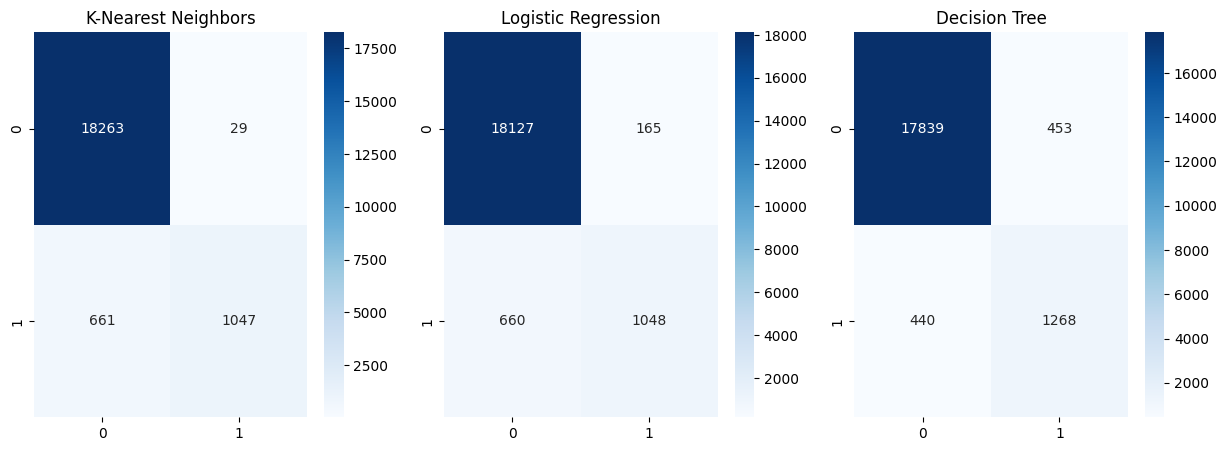

In [25]:
# Confusion matrices
knn_cm = confusion_matrix(y_test, knn_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)
tree_cm = confusion_matrix(y_test, tree_pred)

# Plot heatmaps
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='d', ax=axes[0])
axes[0].set_title('K-Nearest Neighbors')
sns.heatmap(logistic_cm, annot=True, cmap='Blues', fmt='d', ax=axes[1])
axes[1].set_title('Logistic Regression')
sns.heatmap(tree_cm, annot=True, cmap='Blues', fmt='d', ax=axes[2])
axes[2].set_title('Decision Tree')
plt.show()
